**CUANTIZACIÓN - GLOBOS**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

In [28]:
plt.close("all")
plt.rcParams["image.cmap"] = "jet"

In [29]:
def get_random_subset(pixels, N):
    # elegir un conjunto de pixeles aleatorios
    rng = np.random.RandomState(0)
    i = rng.permutation(pixels.shape[0])[:N]
    return pixels[i, :]


def plot_pixel_list(pixels, color_map, title_fig, center_data=False, centers=False):
    # realiza un gráfico 3D de los píxeles recibidos con un vector de Nx3
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    r, g, b = list(pixels[:, 0]), list(pixels[:, 1]), list(pixels[:, 2])
    axis.scatter(r, g, b, c=color_map, marker="o")
    axis.set(xlabel="Red", ylabel="Green", zlabel="Blue",
             xlim=(0, 1), ylim=(0, 1), zlim=(0, 1), title=title_fig)
    if (centers):
        axis.scatter(center_data[:, 0], center_data[:, 1],
                     center_data[:, 2], marker="*", c="red", s=600, alpha=0.8)

    plt.show()

# **Defino la variable k**

In [30]:
k = 10

**Cargar imagen**

In [31]:
img = io.imread("/content/globos.jpg")
img = np.array(img, dtype=np.float64) / 255

**Visualizar imagen**

Text(0.5, 1.0, 'Imagen original')

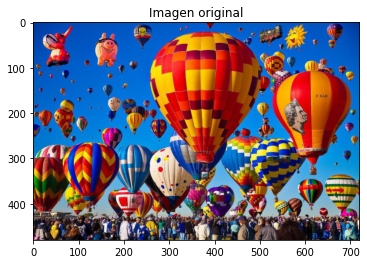

In [32]:
plt.imshow(img)
plt.title("Imagen original")

**Convertir a lista de pixeles**

In [33]:
pixels = img.reshape(img.shape[0]*img.shape[1], 3)

**Datos**

In [34]:
print("--Número de pixels  = ", pixels.shape[0])
print("--Número de colores = ", 2**24)

--Número de pixels  =  345600
--Número de colores =  16777216


**Visualizar pixeles.  obtener un subset aleatorio por cuestiones de performance**

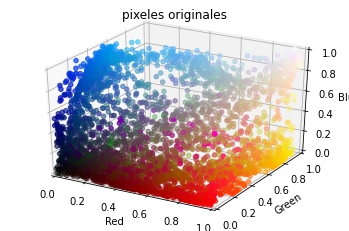

--Número de pixeles usados para plotear y entrenar  =  5000
--Número nuevos colores (K)  =  10


In [35]:
pixels_subset_cant = 5000
pixels_subset = get_random_subset(pixels, pixels_subset_cant)
plot_pixel_list(pixels_subset, pixels_subset, "pixeles originales")
print("--Número de pixeles usados para plotear y entrenar  = ", pixels_subset_cant)
print("--Número nuevos colores (K)  = ", k)

**K-means**

**Aplicar K-means a los píxeles**

In [36]:
modelo = KMeans(n_clusters=k)
modelo.fit(pixels_subset)

KMeans(n_clusters=10)

**Clasificar cada patrón (pixels) con los centroides**

In [37]:
modelo_labels = modelo.predict(pixels_subset)

**Visualizar centros y cuantización**

**Visualizar resultado de K-means**

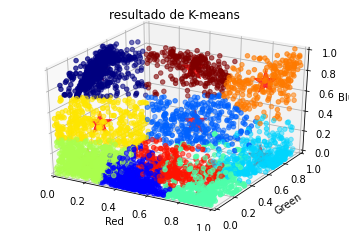

In [38]:
pix_centers = modelo.cluster_centers_
plot_pixel_list(pixels_subset, modelo_labels,
                "resultado de K-means", centers=True, center_data=pix_centers)

**Recolorear la imagen completa**

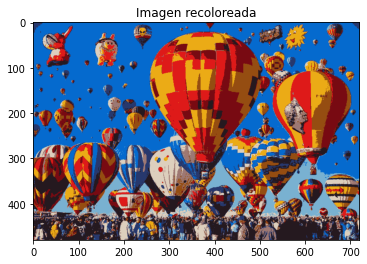

In [39]:
new_colors = modelo.cluster_centers_[modelo.predict(pixels)]
img_recolored = new_colors.reshape(img.shape)
fig = plt.figure()
plt.title("Imagen recoloreada")
plt.imshow(img_recolored)
plt.show()

# **Defino la segunda variable k**

In [40]:
k_1 = 5

**Cargar imagen**

In [41]:
img_1 = io.imread("/content/globos.jpg")
img_1 = np.array(img_1, dtype=np.float64) / 255

**Convertir a lista de pixeles**

In [42]:
pixels_1 = img_1.reshape(img_1.shape[0]*img_1.shape[1], 3)

**Datos**

In [43]:
print("--Número de pixels  = ", pixels_1.shape[0])
print("--Número de colores = ", 2**24)

--Número de pixels  =  345600
--Número de colores =  16777216


**Visualizar pixeles.  obtener un subset aleatorio por cuestiones de performance**

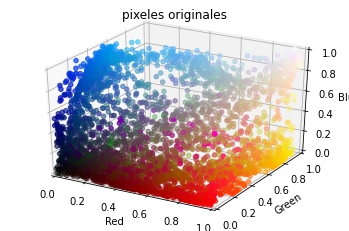

--Número de pixeles usados para plotear y entrenar  =  5000
--Número nuevos colores (K)  =  5


In [44]:
pixels_subset_cant_1 = 5000
pixels_subset_1 = get_random_subset(pixels, pixels_subset_cant_1)
plot_pixel_list(pixels_subset_1, pixels_subset_1, "pixeles originales")
print("--Número de pixeles usados para plotear y entrenar  = ", pixels_subset_cant_1)
print("--Número nuevos colores (K)  = ", k_1)

**K-means**

**Aplicar K-means a los píxeles**

In [45]:
modelo_1 = KMeans(n_clusters=k_1)
modelo_1.fit(pixels_subset_1)

KMeans(n_clusters=5)

**Clasificar cada patrón (pixels) con los centroides**

In [46]:
modelo_labels_1 = modelo_1.predict(pixels_subset_1)

**Visualizar centros y cuantización**

**Visualizar resultado de K-means**

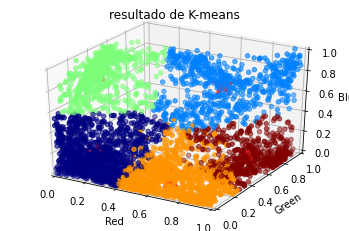

In [47]:
pix_centers_1 = modelo_1.cluster_centers_
plot_pixel_list(pixels_subset_1, modelo_labels_1,
                "resultado de K-means", centers=True, center_data=pix_centers_1)

**Recolorear la imagen completa**

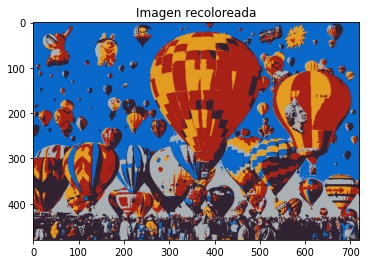

In [48]:
new_colors_1 = modelo_1.cluster_centers_[modelo_1.predict(pixels_1)]
img_recolored_1 = new_colors_1.reshape(img_1.shape)
fig_1 = plt.figure()
plt.title("Imagen recoloreada")
plt.imshow(img_recolored_1)
plt.show()

# **OBSERVACIÓN: A medida que disminuyo el número de clusters (k), se observa que la calidad del modelo empeora notándose en la comparación de la primera imágen recoloreada con la segunda.**